In [1]:
# Decission Trees

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

from sklearn.model_selection import train_test_split

from graphviz import Digraph

In [2]:
# load Occupancy Data

room1 = pd.read_csv("../Files/datatest.txt", sep = ',', header = 0)
room2 = pd.read_csv("../Files/datatraining.txt", sep = ',', header = 0)

In [3]:
room = pd.concat([room1, room2])

In [4]:
# View room data
room.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [5]:
# View the last 5 rows of room data
room.tail()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1
8143,2015-02-10 09:33:00,21.10,36.2000,447.0,821.000000,0.005612,1


In [6]:
room.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,10808.000000,10808.000000,10808.000000,10808.00000,10808.000000,10808.000000
mean,20.819992,25.638407,137.694088,634.00507,0.003903,0.249907
std,1.078410,4.953792,212.175483,312.81727,0.000803,0.432979
min,19.000000,16.745000,0.000000,412.75000,0.002674,0.000000
25%,20.000000,21.390000,0.000000,441.00000,0.003323,0.000000
50%,20.700000,25.680000,0.000000,464.00000,0.003805,0.000000
75%,21.500000,28.324167,413.541667,761.00000,0.004372,0.000000
max,24.408333,39.117500,1697.250000,2028.50000,0.006476,1.000000


In [7]:
# Check for missing data
total = room.isnull().sum().sort_values(ascending=False)
print(total)

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64


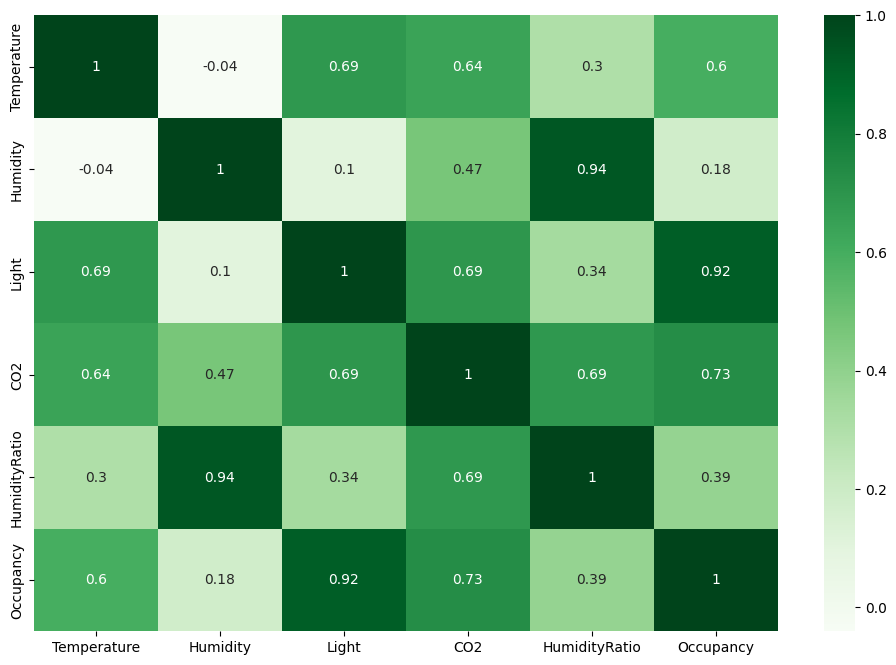

In [8]:
n_room = room.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12,8))
ax = sns.heatmap(n_room.corr(), cmap='Greens', annot=True)
plt.show()

In [9]:
# Print correlations of Occupancy response variable
n_room.corr()[['Occupancy']].sort_values(by='Occupancy', ascending=False)

,Occupancy
Occupancy,1.000000
Light,0.915363
CO2,0.729540
Temperature,0.595005
HumidityRatio,0.386346
Humidity,0.183020


In [10]:
# proportion of occupancy variable
room['Occupancy'].value_counts()

Occupancy
0    8107
1    2701
Name: count, dtype: int64

In [11]:
features = ['Light', 'CO2', 'Temperature', 'HumidityRatio', 'Humidity']

X = room[features]
y = room['Occupancy']

print(X)
print(y)

           Light         CO2  Temperature  HumidityRatio  Humidity
140   585.200000  749.200000      23.7000       0.004764   26.2720
141   578.400000  760.400000      23.7180       0.004773   26.2900
142   572.666667  769.666667      23.7300       0.004765   26.2300
143   493.750000  774.750000      23.7225       0.004744   26.1250
144   488.600000  779.000000      23.7540       0.004767   26.2000
...          ...         ...          ...            ...       ...
8139  433.000000  787.250000      21.0500       0.005579   36.0975
8140  433.000000  789.500000      21.0500       0.005563   35.9950
8141  433.000000  798.500000      21.1000       0.005596   36.0950
8142  433.000000  820.333333      21.1000       0.005621   36.2600
8143  447.000000  821.000000      21.1000       0.005612   36.2000

[10808 rows x 5 columns]
140     1
141     1
142     1
143     1
144     1
       ..
8139    1
8140    1
8141    1
8142    1
8143    1
Name: Occupancy, Length: 10808, dtype: int64


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

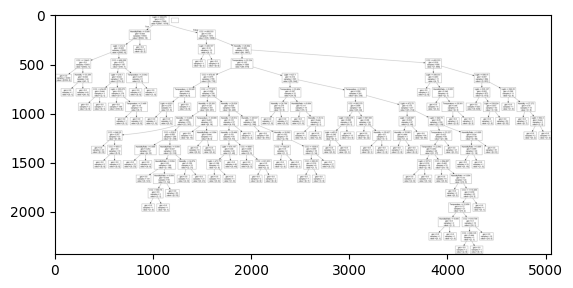

In [13]:
# Create and view decision tree

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()